# Draw a graph that shows the distribution of the players by country on the world map

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

home_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/home_team_parquet"):
    single_stats = pd.read_parquet("raw/home_team_parquet/" + file)
    home_team_dataframe = pd.concat([home_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

away_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/away_team_parquet"):
    single_stats = pd.read_parquet("raw/away_team_parquet/" + file)
    away_team_dataframe = pd.concat([away_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

event_dataframe = pd.DataFrame()
for file in os.listdir("raw/event_parquet"):
    single_stats = pd.read_parquet("raw/event_parquet/" + file)
    event_dataframe = pd.concat([event_dataframe, single_stats], axis= 'rows', ignore_index=True)

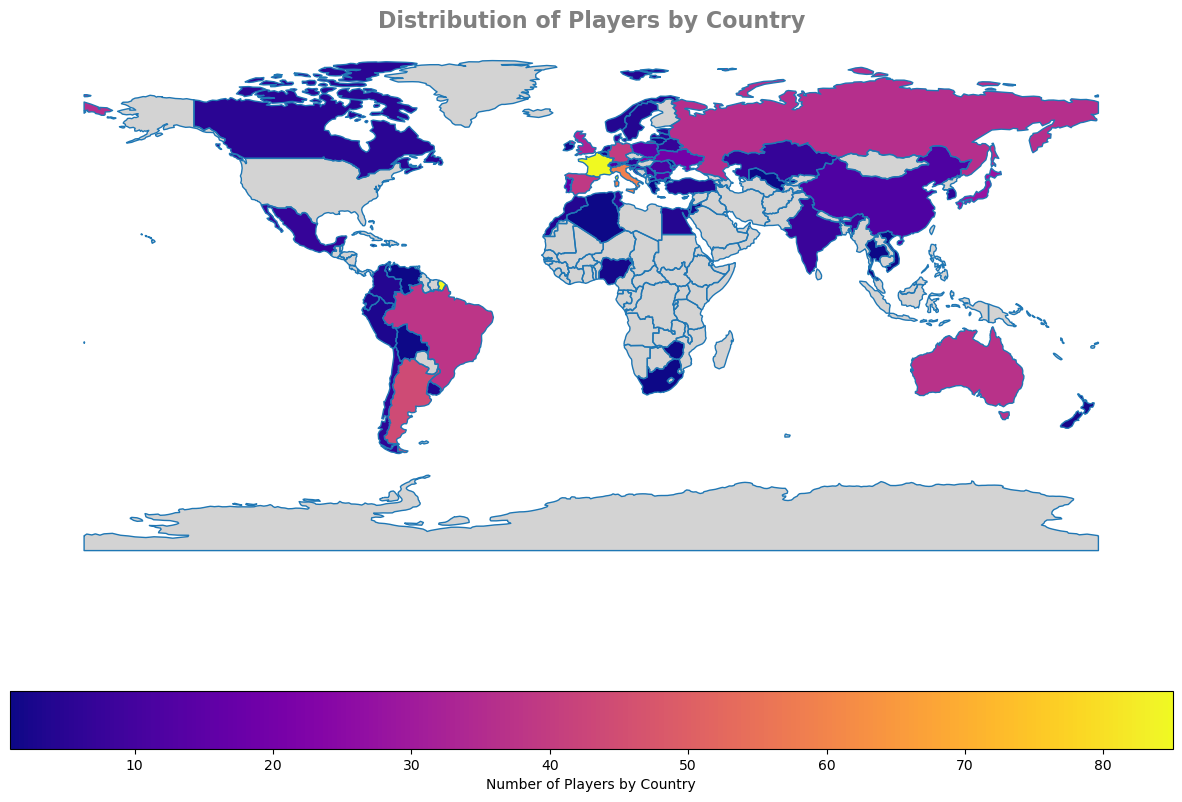

In [2]:
import geopandas as gpd



# Combine home_team_dataframe and away_team_dataframe
combined_dataframe = pd.concat([home_team_dataframe, away_team_dataframe])

# Count the number of players from each country
country_counts = combined_dataframe['country'].value_counts().reset_index()
country_counts.columns = ['country', 'player_count']

# Load geographic data for countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge player data with geographic data
merged = world.merge(country_counts, how="left", left_on="name", right_on="country")

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)

# Plot with a colormap
merged.plot(column='player_count', ax=ax, legend=True,
            legend_kwds={'label': "Number of Players by Country",
                         'orientation': "horizontal"},
            missing_kwds={"color": "lightgrey", "label": "No data"},
            cmap='plasma')

plt.title('Distribution of Players by Country', fontsize=16, color='gray', fontweight='bold')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Remove ticks from both axes
ax.tick_params(axis='both', length=0, width=0, which='both', labelbottom=False, labelleft=False)

plt.show()


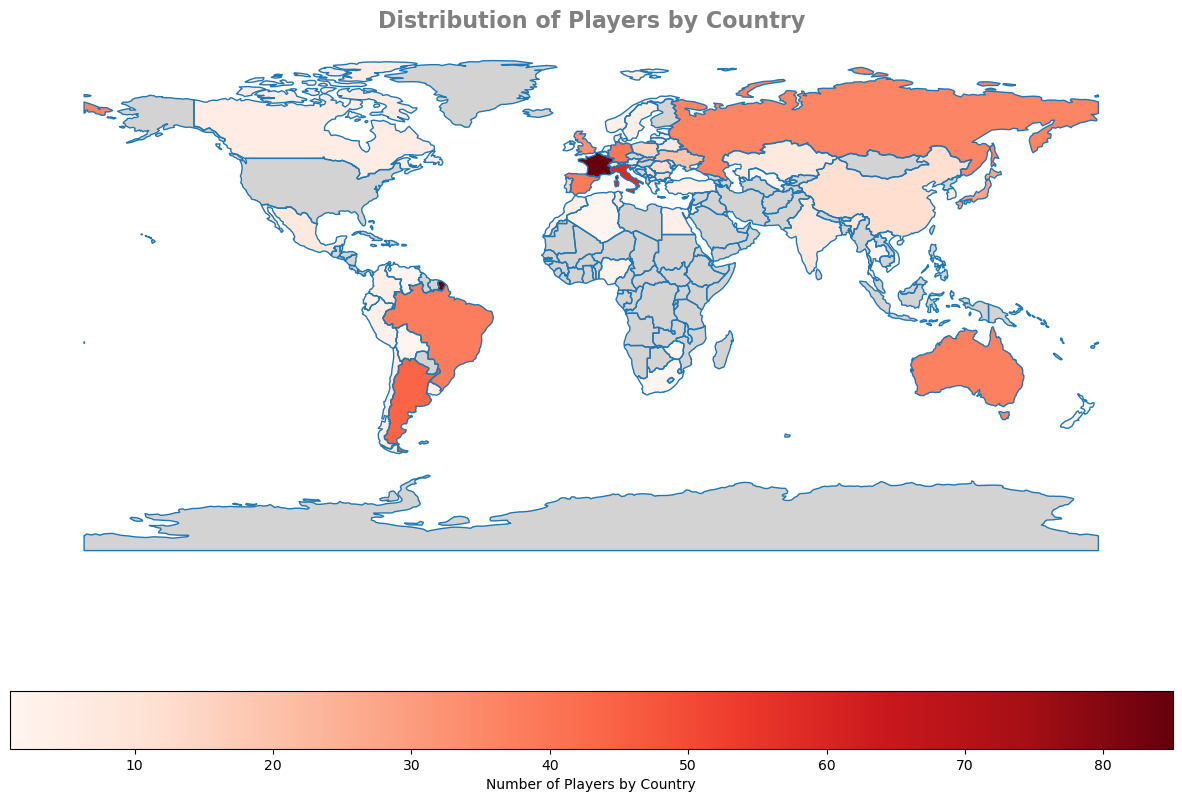

In [4]:

# Combine home_team_dataframe and away_team_dataframe
combined_dataframe = pd.concat([home_team_dataframe, away_team_dataframe])

# Count the number of players from each country
country_counts = combined_dataframe['country'].value_counts().reset_index()
country_counts.columns = ['country', 'player_count']

# Load geographic data for countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge player data with geographic data
merged = world.merge(country_counts, how="left", left_on="name", right_on="country")

# Create a red color palette from light red to dark red
red_palette = sns.color_palette("Reds", as_cmap=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)

# Plot with a colormap
merged.plot(column='player_count', ax=ax, legend=True,
            legend_kwds={'label': "Number of Players by Country",
                         'orientation': "horizontal"},
            missing_kwds={"color": "lightgrey", "label": "No data"},
            cmap=red_palette)

plt.title('Distribution of Players by Country', fontsize=16, color='gray', fontweight='bold')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Remove ticks from both axes
ax.tick_params(axis='both', length=0, width=0, which='both', labelbottom=False, labelleft=False)

plt.show()
